<a href="https://colab.research.google.com/github/Suesue098/Basic/blob/main/Survivability_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('survivability.csv')

In [ ]:
df.head(5)

,dish_id,cross_id,genotype,date_fertilized,date_created,initial_count,status,termination_date,termination_reason,responsible,...,%_water_changed,notes,days_since_fertilization,cumulative_deaths,remaining,survival_rate,fish_density,volume_per_fish,density_category,survival_rate_change
0,14781_1,14781,Casper_HHMI,1/22/2025,2/12/2025,22,inactive,2/4/2025,euthanasia,Jeremy Delahanty,...,0.625,NaN,7,0,22,100.000000,0.2750,3.636364,Medium(3-4ml/fish),NaN
1,14781_1,14781,Casper_HHMI,1/22/2025,2/12/2025,22,inactive,2/4/2025,euthanasia,Jeremy Delahanty,...,0.625,NaN,8,0,22,100.000000,0.2750,3.636364,Medium(3-4ml/fish),0.000000
2,14781_1,14781,Casper_HHMI,1/22/2025,2/12/2025,22,inactive,2/4/2025,euthanasia,Jeremy Delahanty,...,0.625,NaN,9,1,21,95.454545,0.2625,3.809524,Medium(3-4ml/fish),-4.545455
3,14781_1,14781,Casper_HHMI,1/22/2025,2/12/2025,22,inactive,2/4/2025,euthanasia,Jeremy Delahanty,...,0.625,NaN,10,2,20,90.909091,0.2500,4.000000,Medium(3-4ml/fish),-4.545455
4,14781_1,14781,Casper_HHMI,1/22/2025,2/12/2025,22,inactive,2/4/2025,euthanasia,Jeremy Delahanty,...,0.625,NaN,11,5,17,77.272727,0.2125,4.705882,Low(>4ml/fish),-13.636364


In [ ]:
#data cleaning
df.isnull()

,dish_id,cross_id,genotype,date_fertilized,date_created,initial_count,status,termination_date,termination_reason,responsible,...,%_water_changed,notes,days_since_fertilization,cumulative_deaths,remaining,survival_rate,fish_density,volume_per_fish,density_category,survival_rate_change
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
400,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
401,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
402,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
df.drop(columns = ['notes', 'status', 'termination_reason', 'responsible', 'room', 'water_changed'], inplace=True)

In [ ]:
df.head()

,dish_id,cross_id,genotype,date_fertilized,date_created,initial_count,termination_date,in_beaker,vol_water_total,check_date,...,vol_water_changed,%_water_changed,days_since_fertilization,cumulative_deaths,remaining,survival_rate,fish_density,volume_per_fish,density_category,survival_rate_change
0,14781_1,14781,Casper_HHMI,1/22/2025,2/12/2025,22,2/4/2025,No,80,1/29/2025,...,50,0.625,7,0,22,100.000000,0.2750,3.636364,Medium(3-4ml/fish),NaN
1,14781_1,14781,Casper_HHMI,1/22/2025,2/12/2025,22,2/4/2025,No,80,1/30/2025,...,50,0.625,8,0,22,100.000000,0.2750,3.636364,Medium(3-4ml/fish),0.000000
2,14781_1,14781,Casper_HHMI,1/22/2025,2/12/2025,22,2/4/2025,No,80,1/31/2025,...,50,0.625,9,1,21,95.454545,0.2625,3.809524,Medium(3-4ml/fish),-4.545455
3,14781_1,14781,Casper_HHMI,1/22/2025,2/12/2025,22,2/4/2025,No,80,2/1/2025,...,50,0.625,10,2,20,90.909091,0.2500,4.000000,Medium(3-4ml/fish),-4.545455
4,14781_1,14781,Casper_HHMI,1/22/2025,2/12/2025,22,2/4/2025,No,80,2/2/2025,...,50,0.625,11,5,17,77.272727,0.2125,4.705882,Low(>4ml/fish),-13.636364


In [ ]:
# Convert date columns to datetime
df['date_fertilized'] = pd.to_datetime(df['date_fertilized'])
df['check_date'] = pd.to_datetime(df['check_date'])


In [ ]:
df['fish_age'] = (df['check_date'] - df['date_fertilized']).dt.days

In [ ]:
def enhance_plot(title, xlabel, ylabel):
  #plt.title(title, fontsize = 14, fontweight = 'bold')
  #plt.xlabel(xlabel, fontsize=12)
  #plt.ylabel(ylabel, fontsize=12)
  #plt.grid(True, linestyle='--', alpha=0.6)
  #sns.despine()
   plt.title(title, fontsize=20, fontweight='bold', color='darkblue')
   plt.xlabel(xlabel, fontsize=14, color='dimgray')
   plt.ylabel(ylabel, fontsize=14, color='dimgray')
   plt.grid(True, linestyle='--', alpha=0.5, color='gray')
   sns.despine(left=True, bottom=True)

<ipython-input-70-0ce4af756c55>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='days_since_fertilization', y='survival_rate',


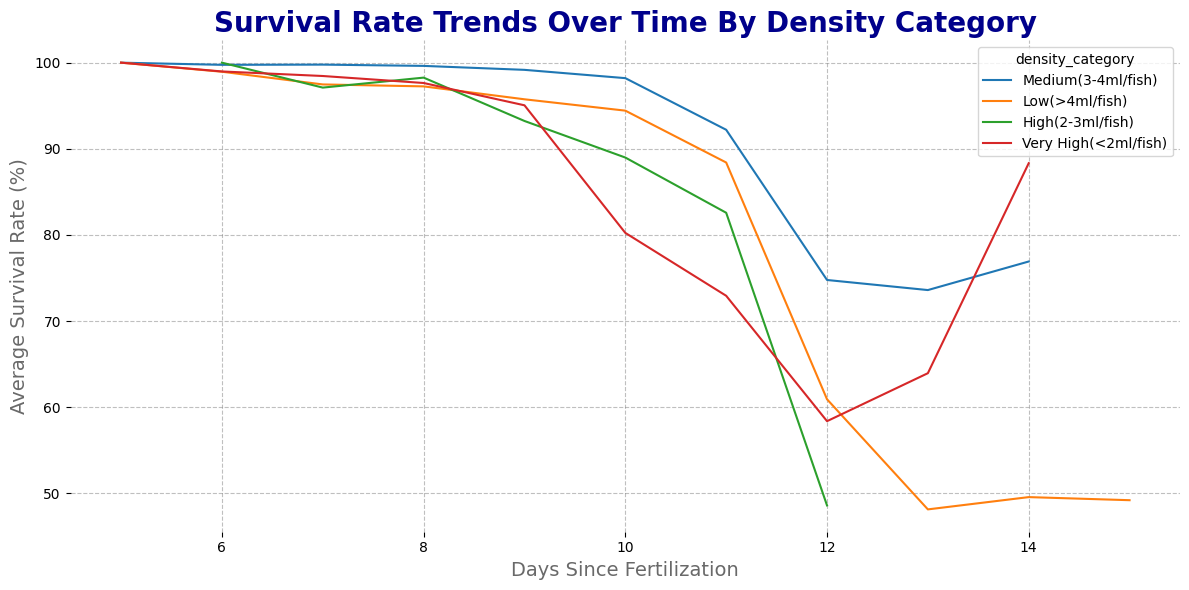

In [ ]:
# Survival rate trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='days_since_fertilization', y='survival_rate',
             hue='density_category', ci=None)
enhance_plot("Survival Rate Trends Over Time By Density Category", "Days Since Fertilization", "Average Survival Rate (%)")
plt.tight_layout()
plt.show()



<ipython-input-71-ac9beff7ba07>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='density_category', y='survival_rate', data=df, palette='coolwarm')


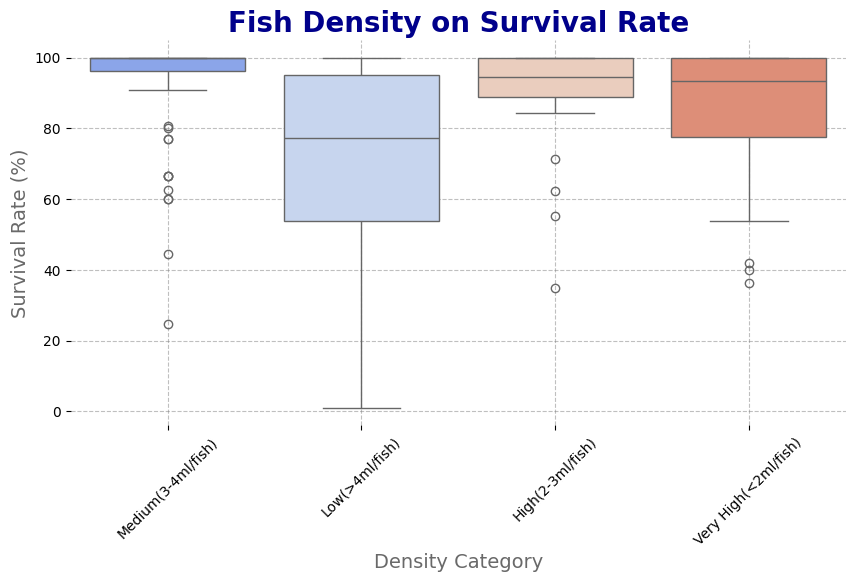

In [ ]:
# Fish density vs. Survival Rate
plt.figure(figsize=(10,5))
sns.boxplot(x='density_category', y='survival_rate', data=df, palette='coolwarm')
plt.xticks(rotation=45)
enhance_plot("Fish Density on Survival Rate", "Density Category", "Survival Rate (%)")
plt.show()


<ipython-input-72-92a96b3ea9e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fish_age', y='survival_rate', data=df, inner='quartile', palette='muted')


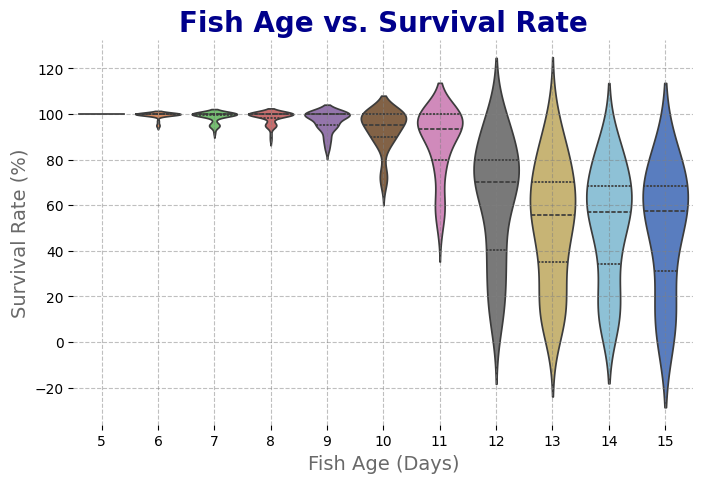

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='fish_age', y='survival_rate', data=df, inner='quartile', palette='muted')
enhance_plot("Fish Age vs. Survival Rate", "Fish Age (Days)", "Survival Rate (%)")
plt.show()

<ipython-input-73-4a559243e9e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genotype', y='initial_count', data=df, palette='pastel')


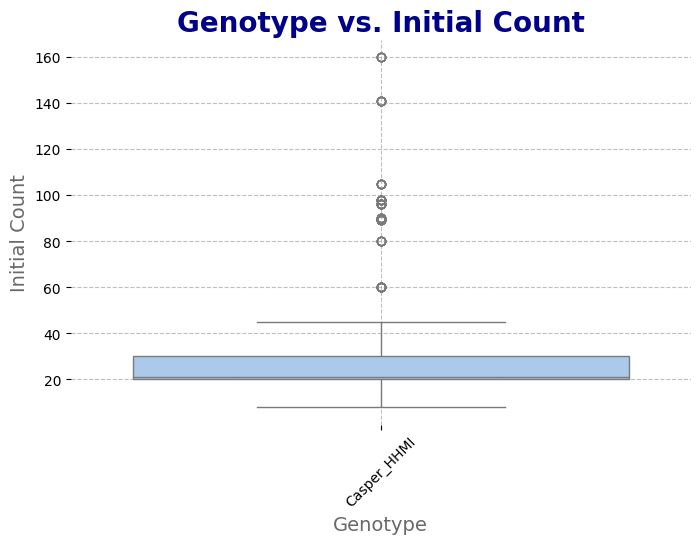

In [ ]:
# Genotype vs. Survival Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='genotype', y='initial_count', data=df, palette='pastel')
enhance_plot("Genotype vs. Initial Count", "Genotype", "Initial Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-83-2da565ae3676>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax[0], x='genotype', y='initial_count', data=df, palette='pastel')


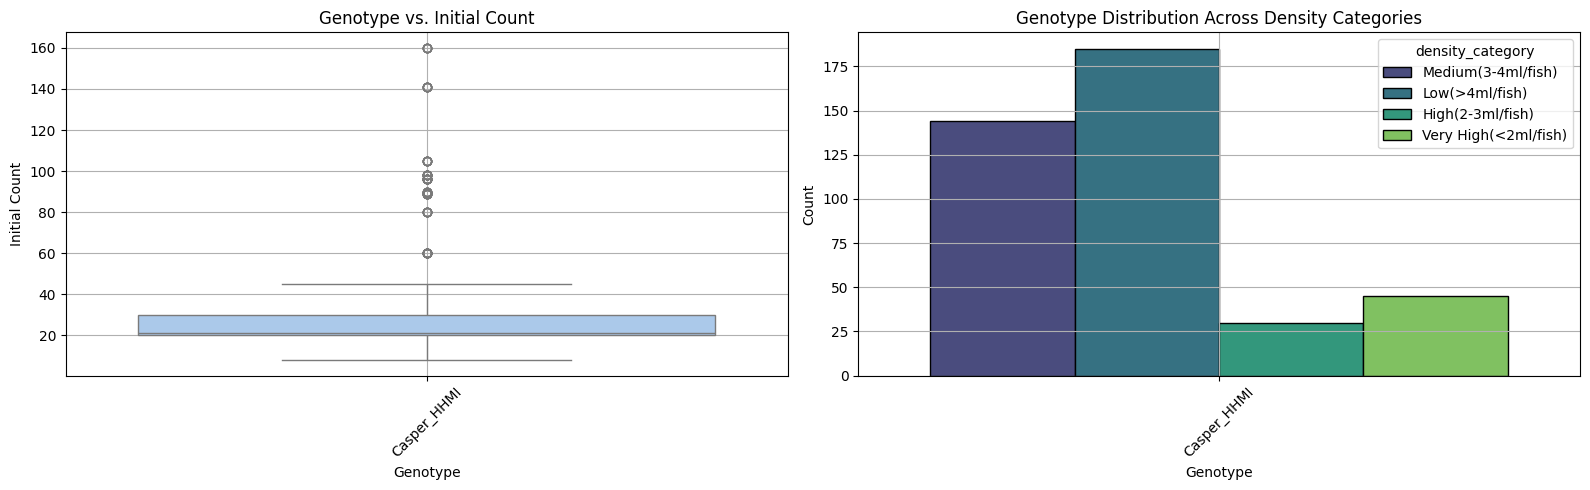

In [ ]:
# Combined Plot: Genotype vs. Initial Count and Density Category
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Box Plot: Genotype vs. Initial Count
sns.boxplot(ax=ax[0], x='genotype', y='initial_count', data=df, palette='pastel')
ax[0].set_title('Genotype vs. Initial Count')
ax[0].set_xlabel('Genotype')
ax[0].set_ylabel('Initial Count')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Count Plot: Genotype vs. Density Category
sns.countplot(ax=ax[1], x='genotype', hue='density_category', data=df, palette='viridis', edgecolor='black')
ax[1].set_title('Genotype Distribution Across Density Categories')
ax[1].set_xlabel('Genotype')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


<ipython-input-82-f7aeac269378>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='in_beaker', y='survival_rate', data=df, palette='Set2')


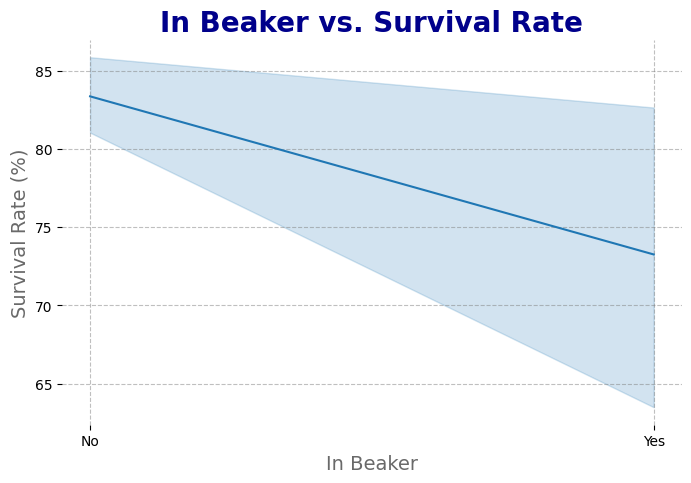

In [ ]:
# In Beaker vs. Survival Rate (Boxplot)
plt.figure(figsize=(8, 5))
sns.lineplot(x='in_beaker', y='survival_rate', data=df, palette='Set2')
enhance_plot("In Beaker vs. Survival Rate", "In Beaker", "Survival Rate (%)")
plt.show()

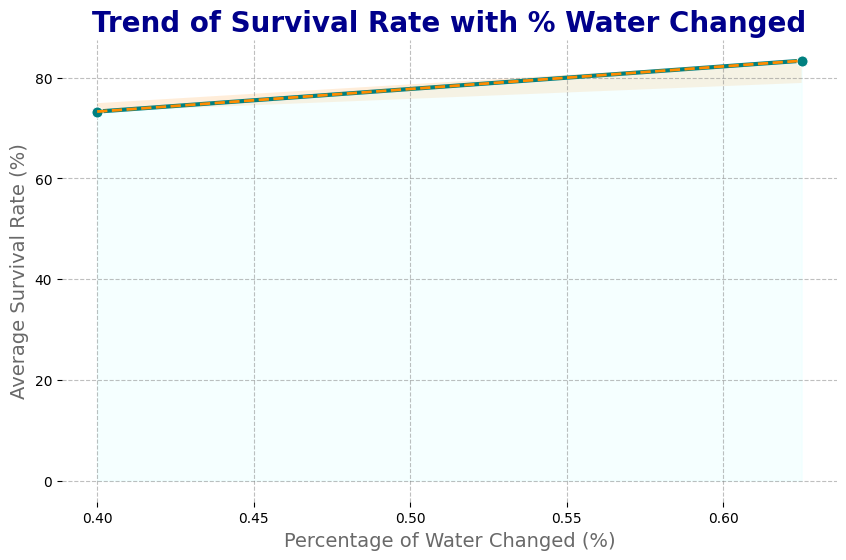

In [ ]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('%_water_changed')['survival_rate'].mean()
sns.lineplot(x=df_grouped.index, y=df_grouped.values, marker='o', color='teal', linewidth=3, markersize=8)
sns.regplot(x=df_grouped.index, y=df_grouped.values, scatter=False, color='darkorange', line_kws={'linewidth': 2, 'ls': '--'})
enhance_plot("Trend of Survival Rate with % Water Changed", "Percentage of Water Changed (%)", "Average Survival Rate (%)")
plt.fill_between(df_grouped.index, df_grouped.values, color='lightcyan', alpha=0.3)  # Gradient fill
plt.show()

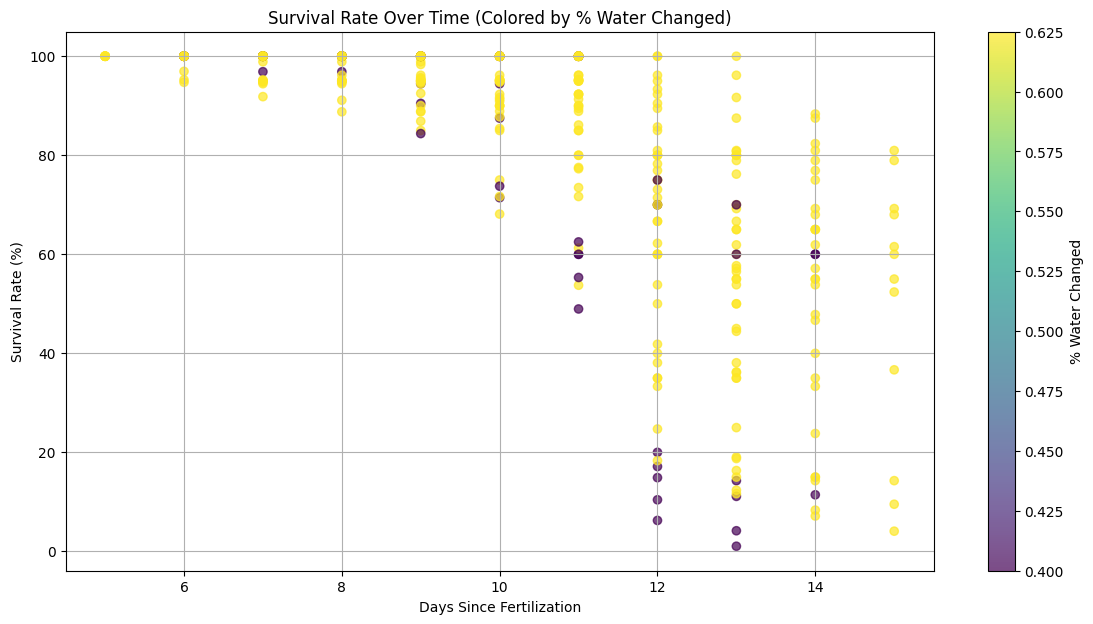

In [ ]:
plt.figure(figsize=(14, 7))
scatter = plt.scatter(df['days_since_fertilization'], df['survival_rate'],
                     c=df['%_water_changed'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='% Water Changed')
plt.title('Survival Rate Over Time (Colored by % Water Changed)')
plt.xlabel('Days Since Fertilization')
plt.ylabel('Survival Rate (%)')
plt.grid(True)
plt.show()

In [1]:
# Summary statistics
print("\nSummary Statistics:")
print(df[['initial_count', 'fish_deaths', 'remaining', 'survival_rate', 'fish_age','%_water_changed','survival_rate']].describe())



Summary Statistics:


NameError: name 'df' is not defined